# Rainfall Prediction using Linear Regression

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd

## Reading the data

In [2]:
df = pd.read_csv("austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


## Dropping unnecessary columns

In [3]:
df = df.drop(["Events","SeaLevelPressureLowInches","Date"],axis = 1)
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T


In [4]:
df = df.replace("T", 0)
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0


In [5]:
df = df.replace('-',0)
df.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0


In [6]:
df.to_csv("final_dataset.csv")

## Importing other libraries

In [7]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv("final_dataset.csv")
df1.head()

,Unnamed: 0,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0.00
2,2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0.00
3,3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0.00
4,4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.00


In [10]:
df1 = df1.drop(['Unnamed: 0'], axis = 1)
df1.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0.00
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0.00
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0.00
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,0.00


## Creating X and Y

In [20]:
X = df1.drop(['PrecipitationSumInches'], axis = 1)

In [21]:
Y = df1["PrecipitationSumInches"]

## Reshaping into 2D vector

In [22]:
Y = Y.values.reshape(-1,1)

In [23]:
day_index = 798
days = [i for i in range(Y.size)]
days

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Initialising Linear Regression Classifier

In [24]:
clf = LinearRegression()

# Training the classifier
clf.fit(X,Y)

LinearRegression()

## Plot a graph

The Precipitation Trend graph: 


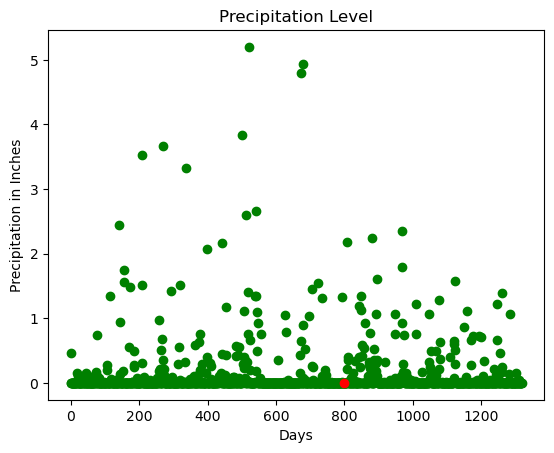

In [26]:
print("The Precipitation Trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color = 'r')
plt.title("Precipitation Level")
plt.xlabel("Days")
plt.ylabel("Precipitation in Inches")
plt.show()
x_vis = X.filter(['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH'])

Precipitation vs Attributes Trend Graph: 


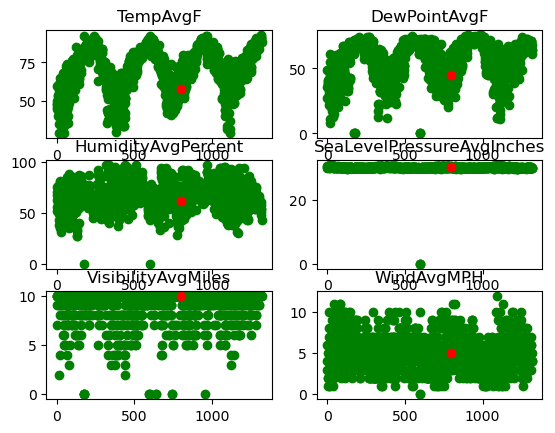

In [30]:
print("Precipitation vs Attributes Trend Graph: ")

for i in range(x_vis.columns.size):
    plt.subplot(3,2,i+1)
    plt.scatter(days, x_vis[x_vis.columns.values[i][:100]], color = 'g')
    plt.scatter(days[day_index], x_vis[x_vis.columns.values[i]][day_index], color = 'r')
    plt.title(x_vis.columns.values[i])
plt.show()